In [3]:
%pip install tensorflow-gpu==2.11.0
%pip install opencv-python
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.11.0 (from versions: 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.11.0


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install protobuf==3.20.3


Note: you may need to restart the kernel to use updated packages.


In [34]:
#%pip install --upgrade pip

In [4]:
%pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached protobuf-3.19.6-cp310-cp310-win_amd64.whl.metadata (806 bytes)
Using cached protobuf-3.19.6-cp310-cp310-win_amd64.whl (895 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.27.3
    Uninstalling protobuf-5.27.3:
      Successfully uninstalled protobuf-5.27.3
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.37.1 requires protobuf<6,>=3.20, but you have protobuf 3.19.6 which is incompatible.
tensorflow-intel 2.17.0 requires keras>=3.2.0, but you have keras 2.10.0 which is incompatible.
tensorflow-intel 2.17.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.19.6 which is incompatible.
tensorflow-intel 2.17.0 requires tensorboard<2.18,>=2.17, but you have tensorboard 2.10.1 which is incompatible.


In [5]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [37]:
#%pip list

In [25]:
import tensorflow as tf
import os

In [26]:
gpus = tf.config.experimental.list_logical_devices('CPU')
gpus


[LogicalDevice(name='/device:CPU:0', device_type='CPU')]

In [27]:
gpus = tf.config.experimental.list_logical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [28]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [29]:
data_dir="data/"

In [30]:
#os.listdir(os.path.join(data_dir,'happy'))

In [31]:
image_exts=['jpeg','jpg','bmp','png']

In [32]:
for image_class in os.listdir(data_dir):
  print(image_class)
  for image in os.listdir(os.path.join(data_dir,image_class)):
    print(image)

happy
05-12-21-happy-people.jpg
07-120104-happy_people_are_not_nice_people.jpg
1-2.jpg
10-Habits-of-Happy-People-Seniors-Today.jpg
1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg
1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
11-Habits-of-Truly-Happy-People.jpg
154006829.jpg
163-1635094_happiness-love-clip-art-happy-people-transparent-background.png
170404-happy-workers-feature.jpg
1902539.jpg
1902540.jpg
1902587.jpg
1920px-face-smile.svg_.png.jpg
1HEoLBLidT2u4mhJ0oiDgig.png
20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg
227-2271622_happy-people-business-team-celebrating-png.png
343515-worldhappinessreport1440.jpg
360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg
60632274._UY200_.jpg
7-Habits-of-Happy-People-image.jpeg
7-principles-of-successful-and-happy-people.png
71hBPTAhIXL.jpg
7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg
8cxKy5g9i.jpg
8e06de1bf2171da2312b6de61c61e4bc.jpg
960x0.jpg
A_Sep20_14_1189155141.jpg
bigstock-Portrait-Of-Smiling-Em

In [33]:
img =cv2.imread(os.path.join(data_dir,'happy','154006829.jpg'))
img.shape


(3744, 5616, 3)

In [34]:
"This code iterates through all subdirectories and files in a specified data_dir, reads each image, checks if the image type is acceptable, and removes any images that are not of an acceptable type. It also handles exceptions that might occur during this process, providing robust and informative feedback."
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir,image_class,image)
    try:
      img=cv2.imread(image_path)
      tip=imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list{}'.format(image_path))
        os.removee(image_path)
    except Exception as e :
      print ('Issue with image {}'.format(image_path))

In [35]:
img.shape

(571, 800, 3)

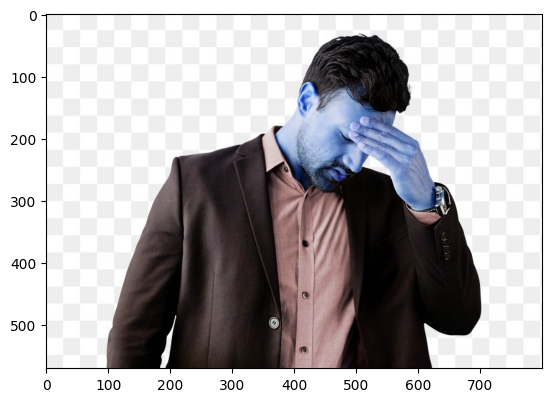

In [36]:
plt.imshow(img)

1.3 Laod data

In [37]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

In [38]:
import numpy as np
from matplotlib import pyplot as plt

In [85]:
data = tf.keras.utils.image_dataset_from_directory('data', batch_size=32)
#this one so that make them all the same so mush goo for the classfication image

Found 308 files belonging to 2 classes.


In [86]:
print(f'Dataset details: {data}')

Dataset details: <BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [87]:
tf.keras.utils.image_dataset_from_directory??
#so look here u can config here the image 
#tf.keras.utils.image_dataset_from_directory("data",batch_size=8,image=(128,128))
#so the shape change


Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [88]:
data_iterator = data.as_numpy_iterator()

In [89]:
data_iterator

In [90]:
#get another img
batch=data_iterator.next()
batch


(array([[[[1.49000000e+02, 1.20000000e+02, 8.00000000e+00],
          [1.69500000e+02, 1.41000000e+02, 5.50000000e+00],
          [1.90500000e+02, 1.61000000e+02, 4.00000000e+00],
          ...,
          [1.02000000e+02, 1.03500000e+02, 4.30000000e+01],
          [8.35000000e+01, 8.25000000e+01, 3.65000000e+01],
          [7.45000000e+01, 7.20000000e+01, 3.55000000e+01]],
 
         [[1.52500000e+02, 1.24500000e+02, 6.00000000e+00],
          [1.72500000e+02, 1.44500000e+02, 5.00000000e+00],
          [1.90500000e+02, 1.61000000e+02, 4.00000000e+00],
          ...,
          [1.05000000e+02, 1.06500000e+02, 4.40000000e+01],
          [8.70000000e+01, 8.65000000e+01, 3.85000000e+01],
          [7.80000000e+01, 7.60000000e+01, 3.75000000e+01]],
 
         [[1.54500000e+02, 1.28500000e+02, 1.50000000e+00],
          [1.75000000e+02, 1.48000000e+02, 2.00000000e+00],
          [1.91000000e+02, 1.62000000e+02, 2.00000000e+00],
          ...,
          [1.07000000e+02, 1.09500000e+02, 4.2500

In [91]:
#class 1 sad / class 0 happy
batch[1].shape
#images 
batch[0].shape


(32, 256, 256, 3)

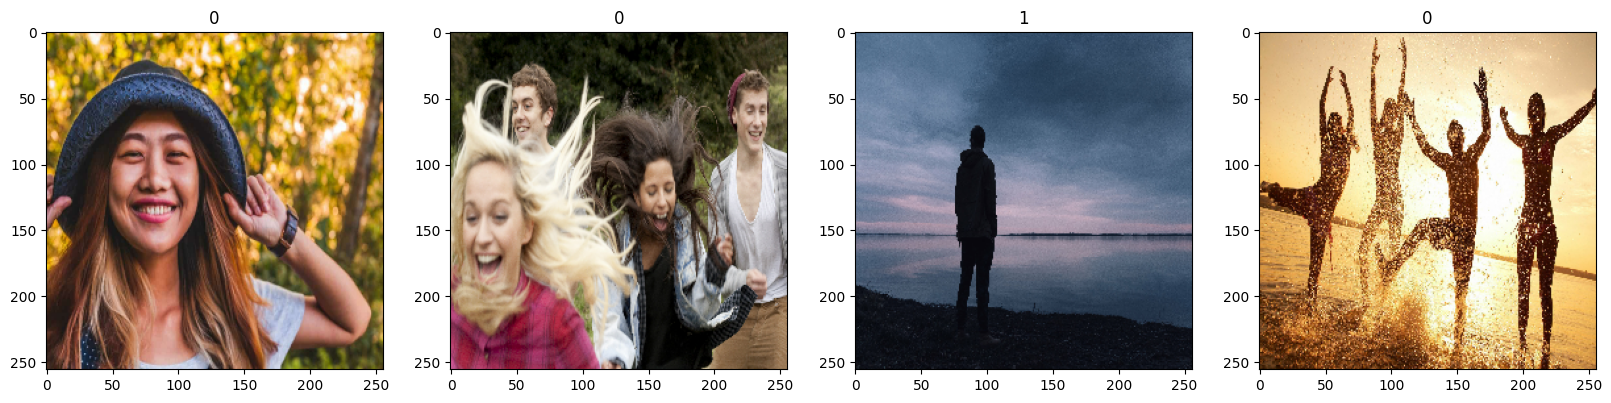

In [92]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

2.Preposs data

In [93]:
scaled =batch[0]/255

scaled.max()


1.0

2.Preprocess Data

In [94]:
data = data.map(lambda x,y:(x/255,y))

In [95]:
scaled_iterator = data.as_numpy_iterator()

In [96]:
batch = scaled_iterator.next()

In [97]:
batch[0].min()

0.0

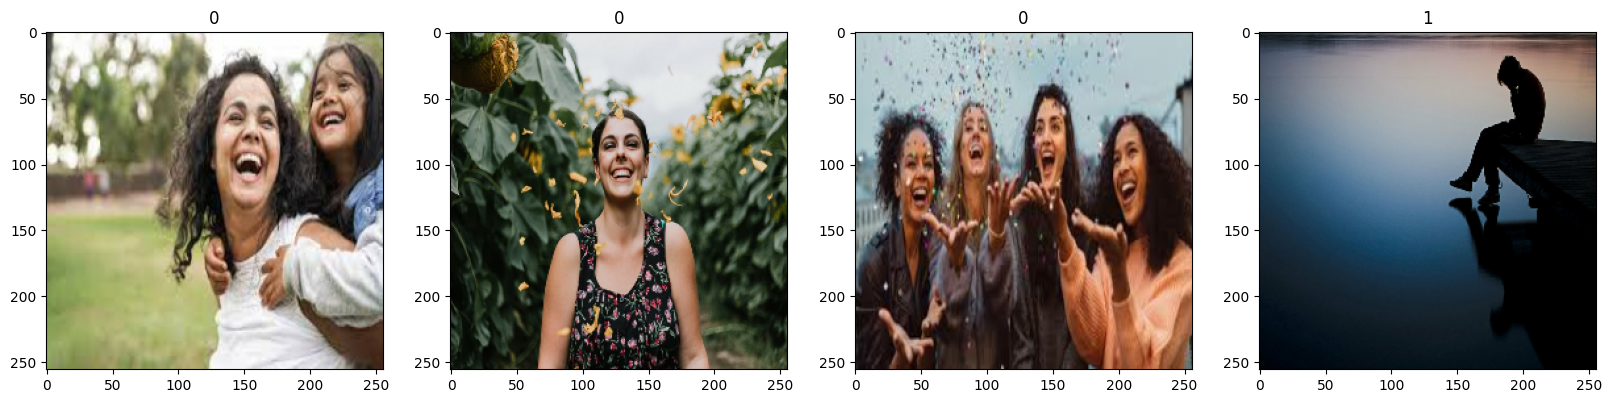

In [98]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
plt.show()

In [99]:
data.as_numpy_iterator().next()[0].min()

0.0

2.2 split data

In [100]:
len (data)

10

In [101]:
train_size = int(len(data)*.7)
val_size =int(len(data)*.2)+1
test_size = int (len(data)*.1)+1

In [102]:
train_size+val_size+test_size

12

In [103]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [104]:
len(val)

3

3.Deep Model 

DL build model

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense, Flatten , Dropout

In [106]:
model = Sequential()

In [107]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Dropout(0.25))  # Add dropout

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [108]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [109]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 127, 127, 16)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 62, 62, 32)       

3.Train

In [110]:
logdir='logs'

In [111]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [112]:
hist = model.fit(train,epochs=45,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/45
7/7 [==============================] - 16s 2s/step - loss: 1.2372 - accuracy: 0.4955 - val_loss: 0.6849 - val_accuracy: 0.5357
Epoch 2/45
7/7 [==============================] - 12s 1s/step - loss: 0.6941 - accuracy: 0.5625 - val_loss: 0.6933 - val_accuracy: 0.4167
Epoch 3/45
7/7 [==============================] - 12s 1s/step - loss: 0.6634 - accuracy: 0.6205 - val_loss: 0.6536 - val_accuracy: 0.7500
Epoch 4/45
7/7 [==============================] - 12s 1s/step - loss: 0.6281 - accuracy: 0.6384 - val_loss: 0.6450 - val_accuracy: 0.7857
Epoch 5/45
7/7 [==============================] - 12s 1s/step - loss: 0.6277 - accuracy: 0.7009 - val_loss: 0.6197 - val_accuracy: 0.8095
Epoch 6/45
7/7 [==============================] - 13s 1s/step - loss: 0.5440 - accuracy: 0.7277 - val_loss: 0.5418 - val_accuracy: 0.8452
Epoch 7/45
7/7 [==============================] - 13s 1s/step - loss: 0.5712 - accuracy: 0.7232 - val_loss: 0.5059 - val_accuracy: 0.8095
Epoch 8/45
7/7 [==================

3.3 Plot performance

In [113]:
hist.history

{'loss': [1.2372453212738037,
  0.6940975785255432,
  0.6634268760681152,
  0.6281294226646423,
  0.627685010433197,
  0.5440304279327393,
  0.571221113204956,
  0.5176404118537903,
  0.49746185541152954,
  0.44843408465385437,
  0.40608876943588257,
  0.38483792543411255,
  0.35311123728752136,
  0.31924036145210266,
  0.35079002380371094,
  0.32868170738220215,
  0.2952580451965332,
  0.23463614284992218,
  0.21571612358093262,
  0.20353423058986664,
  0.21586298942565918,
  0.1476665735244751,
  0.22381381690502167,
  0.11717556416988373,
  0.12239445000886917,
  0.13315941393375397,
  0.0985974594950676,
  0.09213589131832123,
  0.08263082802295685,
  0.06393387168645859,
  0.08964186906814575,
  0.04524708539247513,
  0.054024867713451385,
  0.052221428602933884,
  0.040087636560201645,
  0.049368709325790405,
  0.048821818083524704,
  0.04864492267370224,
  0.07270612567663193,
  0.05637470260262489,
  0.03705165535211563,
  0.039954330772161484,
  0.09373090416193008,
  0.049277

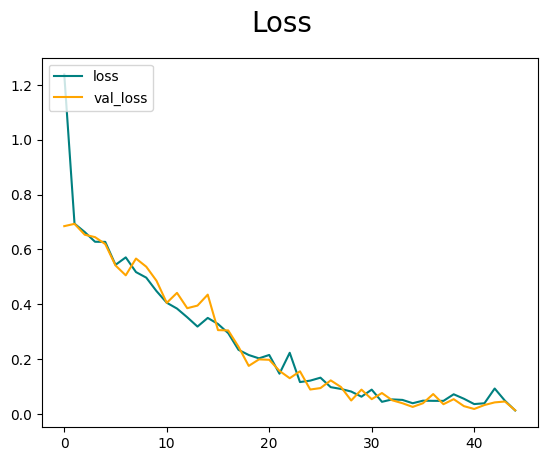

In [115]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

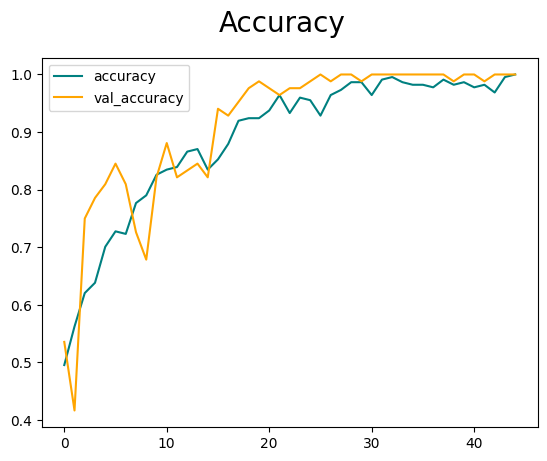

In [116]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

4. Evaluate Perf

4.1 Evaluate

In [117]:
from tensorflow.keras.metrics import Precision , Recall , BinaryAccuracy

In [118]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [119]:
len(test)

0

In [120]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [121]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accurcy:{acc.result().numpy()}')

Precision:0.0,Recall:0.0,Accurcy:0.0


4.2 TEST

In [122]:
img = cv2.imread('trisre.png')


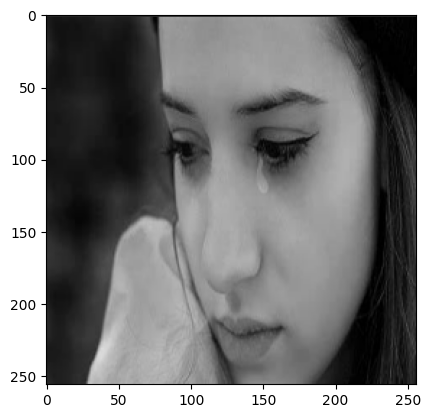

In [123]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [124]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [125]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 383ms/step


In [126]:
if yhat >0.5:
    print('predicted class is sad',yhat)
else :
     print('predicted class is happy',yhat)


predicted class is sad [[0.99996924]]


5. Save the model

5.1 Save the Model

In [127]:
from tensorflow.keras.models import load_model

In [128]:
model.save(os.path.join('models','happysadmodel5.h5'))

In [129]:
new_model = load_model(os.path.join('models','happysadmodel5.h5'))

In [130]:
yhat2 = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 140ms/step


In [131]:
if yhat2 >0.5:
    print('predicted class is sad')
else :
     print('predicted class is happy')


predicted class is sad


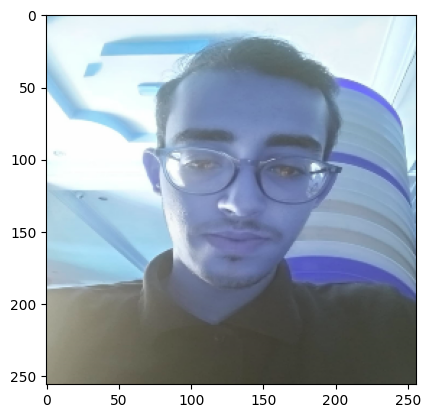

In [3]:
import tensorflow as tf
import os
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.models import load_model
import numpy as np

predict = 0
img = cv2.imread('happy.PNG')
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [4]:

for i in range(6) :
    new_model = load_model(os.path.join('models',f'happysadmodel{i}.h5'))
    a=  new_model.predict(np.expand_dims(resize/255,0))
    print(a,f'{i}')
    predict = predict+a
prediction =predict/6
if prediction >0.5:
    print('predicted class is sad',prediction)
else :
     print('predicted class is happy',prediction)
predict=0

1/1 [==============================] - 0s 142ms/step
[[0.37482244]] 0
1/1 [==============================] - 0s 135ms/step
[[0.9185732]] 1
1/1 [==============================] - 0s 158ms/step
[[0.68919045]] 2
1/1 [==============================] - 0s 128ms/step
[[0.59750646]] 3
1/1 [==============================] - 0s 132ms/step
[[0.76932967]] 4
1/1 [==============================] - 0s 133ms/step
[[0.7626737]] 5
predicted class is sad [[0.6853494]]
